In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd

In [28]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [30]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [36]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [37]:
meas_cols = inspector.get_columns('measurement')
for col in meas_cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
stn_cols = inspector.get_columns('station')
for col in stn_cols:
    print(col['name'], col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [39]:
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [40]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
order_by(Measurement.date.desc()).limit(5).all()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0)]

In [41]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).limit(1).all()[0][0]

In [42]:
last_date = last_date.replace("2017","2016")

In [43]:
last_date

'2016-08-23'

In [44]:
# Perform a query to retrieve the data and precipitation scores
one_years_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(Measurement.date > last_date).all()
one_years_data

[(2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'USC00519397', '2016-09-12', 0.0, 78.0),
 (2385, 'U

In [45]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query = one_years_data = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(Measurement.date > last_date).statement

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.read_sql_query(query, session.bind)
measurement_df.head()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


In [47]:
measurement_df['date'] = pd.to_datetime(measurement_df['date'])
measurement_df.dtypes

id                  int64
station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

In [48]:
measurement_df = measurement_df.sort_values("date")
measurement_df.head()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1006,8826,USC00517948,2016-08-24,NaN,78.0
1524,14609,USC00519281,2016-08-24,2.15,77.0
702,7332,USC00514830,2016-08-24,2.28,80.0
360,5092,USC00513117,2016-08-24,2.15,76.0


In [49]:
# Sort the dataframe by date
measurement_df = measurement_df.set_index("date")

In [50]:
measurement_df['prcp'] = measurement_df['prcp'].fillna(0)

In [51]:
len(measurement_df)

2223

In [52]:
measurement_df.head(10)

,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,8826,USC00517948,0.00,78.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0
2016-08-24,19203,USC00516128,1.45,74.0
2016-08-24,11852,USC00519523,1.22,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-25,8827,USC00517948,0.00,81.0


In [53]:
measurement_df.tail(10)

,id,station,prcp,tobs
date,,,,
2017-08-21,7634,USC00514830,0.02,79.0
2017-08-21,2722,USC00519397,0.00,81.0
2017-08-21,12185,USC00519523,0.00,82.0
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-22,2723,USC00519397,0.00,82.0
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0


In [54]:
measurement_df['prcp'] = measurement_df['prcp'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


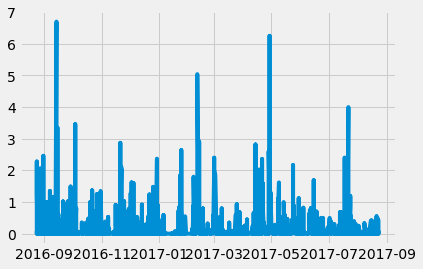

In [55]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(measurement_df.index,measurement_df['prcp'])

In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df['prcp'].describe()

count    2223.000000
mean        0.159951
std         0.441220
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: prcp, dtype: float64

In [57]:
measurement_df.head()

,id,station,prcp,tobs
date,,,,
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-24,8826,USC00517948,0.00,78.0
2016-08-24,14609,USC00519281,2.15,77.0
2016-08-24,7332,USC00514830,2.28,80.0
2016-08-24,5092,USC00513117,2.15,76.0


In [58]:
# Design a query to show how many stations are available in this dataset?
# Number of unique stations using panda dataframe methods
num_stations = len( measurement_df['station'].unique() )
num_stations

7

In [59]:
# Number of unique stations using sql alchemy query
num_stations_sql_alc = session.query(Measurement).distinct(Measurement.station).group_by(Measurement.station).\
filter(Measurement.date > last_date).count()
num_stations_sql_alc

7

In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_groupby = measurement_df.groupby('station')

In [61]:
station_groupby['id'].count().sort_values(ascending=False)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: id, dtype: int64

In [62]:
most_act_stn = station_groupby['id'].count().sort_values(ascending=False)[0:1].index.values[0]
most_act_stn

'USC00519397'

In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
measurement_df[measurement_df['station']==most_act_stn]['prcp'].describe()

count    360.000000
mean       0.044694
std        0.188561
min        0.000000
25%        0.000000
50%        0.000000
75%        0.020000
max        2.620000
Name: prcp, dtype: float64

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_groupby['tobs'].count().sort_values(ascending=False)

station
USC00519397    360
USC00519281    351
USC00516128    348
USC00513117    342
USC00519523    336
USC00514830    304
USC00517948    182
Name: tobs, dtype: int64

In [65]:
len( measurement_df[measurement_df['tobs'].notna()] )

2223

In [66]:
# there are no na values for temp measurement so station is same as above
measurement_df[measurement_df['tobs'].isna()]

,id,station,prcp,tobs
date,,,,


In [67]:
temp_df_stn97 = measurement_df[measurement_df['station']==most_act_stn][['tobs']]

In [68]:
temp_df_stn97.head()

,tobs
date,
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0
2016-08-28,78.0


Text(0, 0.5, 'Number of values')

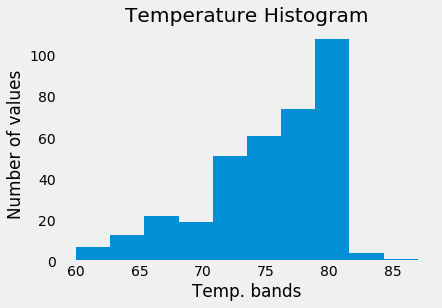

In [69]:
temp_df_stn97.hist(grid=False)
plt.title("Temperature Histogram")
plt.xlabel("Temp. bands")
plt.ylabel("Number of values")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
